In [14]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] =  (16,9)
plt.style.use('ggplot')

In [15]:
#import the data set

data = pd.read_csv('/Users/macbook/Documents/Data_Science/ML_DL/clustering/friendly-fortnight-master/xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


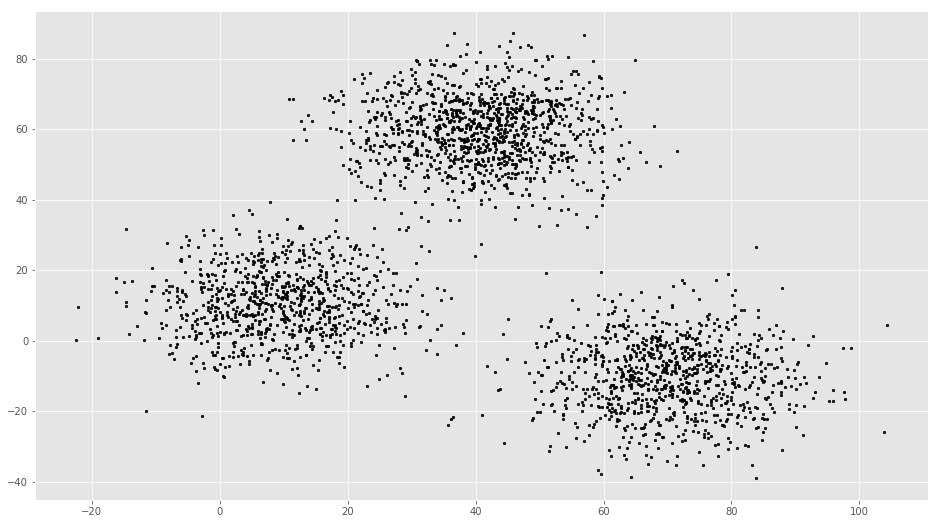

In [20]:
#getting the values and plotting it.

f1 = data['V1'].values
f2 = data['V2'].values

X = np.array(list(zip(f1,f2)))
plt.scatter(f1,f2,c='black',s=7)

In [25]:
#ecludian distance calculater 

def dist(a, b, ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [26]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[49. 24.]
 [77. 29.]
 [29. 19.]]


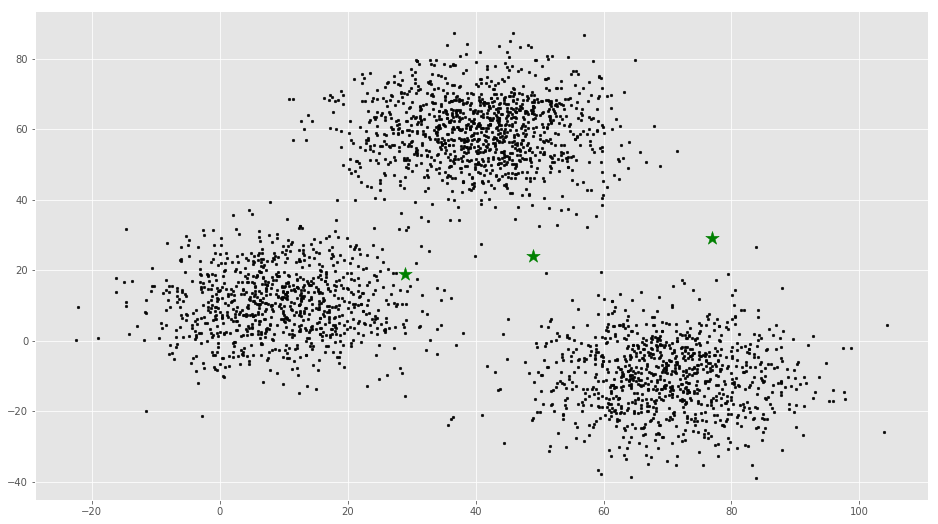

In [27]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [28]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

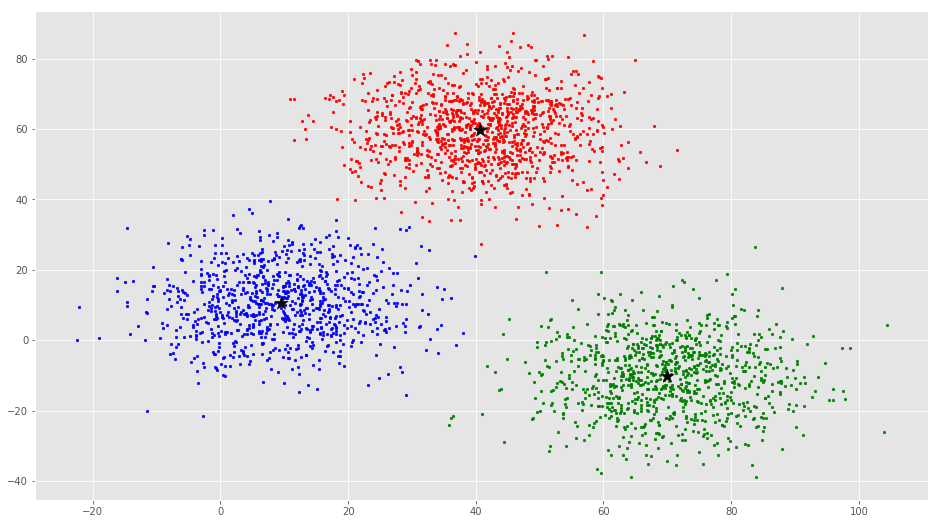

In [29]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [32]:
#sciket learn approach using k-means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
#fitting input data
kmeans = kmeans.fit(X)

In [35]:
#geting the cluster labels
lebels = kmeans.predict(X)
#centroid values.

centroids = kmeans.cluster_centers_

In [36]:
print(centroids)

[[  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]]


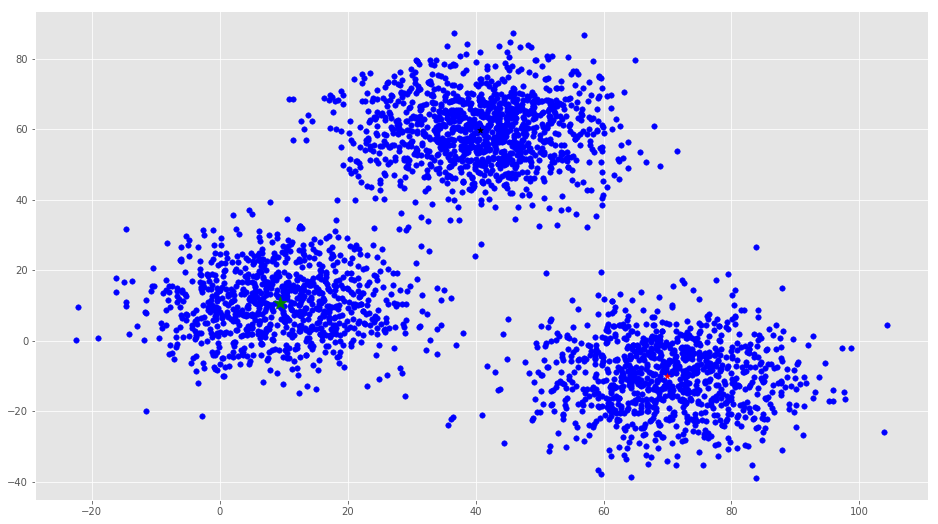

In [47]:
# Display the cluster centroids
plt.scatter(X[:,0],X[:,1],s=30,c='b')
plt.scatter(9.4780459,10.686052,s=200,c='g',marker='*')
plt.scatter(69.92418447,-10.11964119,c='r',marker='*')
plt.scatter(40.68362784,59.71589274,c='black',marker='*')

In [48]:
#testing the alogorithm.

kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)